# Healthcare ML Model
## Author: Aron Gu
## Date: October 19, 2024

In [98]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score, accuracy_score, mean_squared_error, mean_absolute_error, roc_curve, auc, roc_auc_score, f1_score, recall_score, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

## Load the Healthcare Dataset

In [99]:
health_data = pd.read_csv("Healthcare_Data_Preprocessed.csv")

# Set the option to display all columns
pd.set_option('display.max_columns', None)

## Analyze Healthcare Dataset

### Display Rows of Dataset

In [100]:
health_data.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,Target,Smoking,Alcohol,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,37.0,26.0,111.0,198.0,99.0,72.0,37.0,37.0,37.0,37.0,1,2,2,1,2,1,0,1,False,True,True,False,False
1,37.0,24.0,121.0,199.0,103.0,75.0,37.0,37.0,37.0,37.0,1,0,1,1,2,1,2,2,False,False,True,False,False
2,81.0,27.0,147.0,203.0,100.0,74.0,81.0,81.0,81.0,81.0,0,2,1,2,0,0,1,0,True,False,False,False,False
3,25.0,21.0,150.0,199.0,102.0,70.0,25.0,25.0,25.0,25.0,0,2,0,1,2,1,2,0,True,False,False,True,False
4,24.0,26.0,146.0,202.0,99.0,76.0,24.0,24.0,24.0,24.0,0,0,1,2,0,2,0,2,False,True,False,True,False


In [101]:
health_data.tail()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,Target,Smoking,Alcohol,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
9995,5.0,22.0,109.0,203.0,98.0,75.0,5.0,5.0,5.0,5.0,0,2,0,0,2,2,1,0,True,False,True,False,False
9996,94.0,26.0,144.0,203.0,96.0,72.0,94.0,94.0,94.0,94.0,0,0,2,1,0,1,0,2,False,True,False,True,False
9997,37.0,23.0,185.0,198.0,103.0,72.0,37.0,37.0,37.0,37.0,0,1,0,1,0,2,0,1,True,False,True,False,False
9998,50.0,29.0,166.0,200.0,100.0,74.0,50.0,50.0,50.0,50.0,0,1,1,2,0,0,1,1,True,False,True,False,False
9999,69.0,29.0,178.0,203.0,100.0,75.0,69.0,69.0,69.0,69.0,0,2,0,1,2,1,2,0,False,False,True,False,False


### Get Dimensions/Shape of Data Set

In [102]:
health_data.shape

(10000, 23)

### Get Data Types for Each Column

In [103]:
health_data.dtypes

Age                     float64
BMI                     float64
Blood_Pressure          float64
Cholesterol             float64
Glucose_Level           float64
Heart_Rate              float64
Sleep_Hours             float64
Exercise_Hours          float64
Water_Intake            float64
Stress_Level            float64
Target                    int64
Smoking                   int64
Alcohol                   int64
Diet                      int64
MentalHealth              int64
PhysicalActivity          int64
MedicalHistory            int64
Allergies                 int64
Diet_Type_Vegan            bool
Diet_Type_Vegetarian       bool
Blood_Group_AB             bool
Blood_Group_B              bool
Blood_Group_O              bool
dtype: object

### Get Numerical Columns

In [104]:
# Numerical datatypes in dataset(doesn't include int64 since from dataset it's considered categorical)
health_data.select_dtypes(include='float64').dtypes

Age               float64
BMI               float64
Blood_Pressure    float64
Cholesterol       float64
Glucose_Level     float64
Heart_Rate        float64
Sleep_Hours       float64
Exercise_Hours    float64
Water_Intake      float64
Stress_Level      float64
dtype: object

### Get Categorical Columns

In [105]:
# Categorical datatypes in dataset(int64 since from dataset it's considered categorical)
health_data.select_dtypes(include='int64').dtypes

Target              int64
Smoking             int64
Alcohol             int64
Diet                int64
MentalHealth        int64
PhysicalActivity    int64
MedicalHistory      int64
Allergies           int64
dtype: object

### Get General Data Information

In [106]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   BMI                   10000 non-null  float64
 2   Blood_Pressure        10000 non-null  float64
 3   Cholesterol           10000 non-null  float64
 4   Glucose_Level         10000 non-null  float64
 5   Heart_Rate            10000 non-null  float64
 6   Sleep_Hours           10000 non-null  float64
 7   Exercise_Hours        10000 non-null  float64
 8   Water_Intake          10000 non-null  float64
 9   Stress_Level          10000 non-null  float64
 10  Target                10000 non-null  int64  
 11  Smoking               10000 non-null  int64  
 12  Alcohol               10000 non-null  int64  
 13  Diet                  10000 non-null  int64  
 14  MentalHealth          10000 non-null  int64  
 15  PhysicalActivity    

### Get Summary on Dataset

In [107]:
# For numerical data
health_data.describe(include = 'float64')

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.228000,25.711500,131.027300,199.252100,100.115700,73.531400,41.344000,41.344000,41.344000,41.344000
std,24.350238,1.944594,27.631176,2.105941,2.211471,1.724329,27.791396,27.791396,27.791396,27.791396
min,0.000000,19.000000,22.000000,192.000000,93.000000,67.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,24.000000,115.000000,198.000000,99.000000,72.000000,25.000000,25.000000,25.000000,25.000000
50%,37.000000,26.000000,135.000000,199.000000,100.000000,74.000000,37.000000,37.000000,37.000000,37.000000
75%,49.000000,27.000000,150.000000,201.000000,102.000000,75.000000,49.000000,49.000000,49.000000,49.000000
max,100.000000,32.000000,225.000000,207.000000,107.000000,80.000000,201.000000,201.000000,201.000000,201.000000


In [108]:
# For categorical data
int_cols = health_data.select_dtypes(include='int64')
for col in int_cols:
    print("Counts:")
    print(health_data[col].value_counts())
    print("\n")

Counts:
Target
0    5001
1    4999
Name: count, dtype: int64


Counts:
Smoking
0    3354
1    3347
2    3299
Name: count, dtype: int64


Counts:
Alcohol
0    3370
1    3333
2    3297
Name: count, dtype: int64


Counts:
Diet
2    3358
1    3339
0    3303
Name: count, dtype: int64


Counts:
MentalHealth
0    3405
2    3372
1    3223
Name: count, dtype: int64


Counts:
PhysicalActivity
1    3440
2    3283
0    3277
Name: count, dtype: int64


Counts:
MedicalHistory
1    3375
2    3322
0    3303
Name: count, dtype: int64


Counts:
Allergies
0    3366
1    3337
2    3297
Name: count, dtype: int64




In [109]:
# For one hot encoded data
health_data.describe(include = 'bool')

,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
count,10000,10000,10000,10000,10000
unique,2,2,2,2,2
top,False,False,False,False,False
freq,6693,6640,7550,7471,7462


### Identify Missing Values in Dataset

In [110]:
health_data.isnull().sum()

Age                     0
BMI                     0
Blood_Pressure          0
Cholesterol             0
Glucose_Level           0
Heart_Rate              0
Sleep_Hours             0
Exercise_Hours          0
Water_Intake            0
Stress_Level            0
Target                  0
Smoking                 0
Alcohol                 0
Diet                    0
MentalHealth            0
PhysicalActivity        0
MedicalHistory          0
Allergies               0
Diet_Type_Vegan         0
Diet_Type_Vegetarian    0
Blood_Group_AB          0
Blood_Group_B           0
Blood_Group_O           0
dtype: int64

- No missing values in dataset, however from the problem statement there is an issue with some of the entries with the numerical columns as the values are either 0 or -0.

In [111]:
# Identify float64 columns
float_cols = health_data.select_dtypes(include=['float64']).columns

# Filter rows where any float64 column has a value <= 0
health_data[(health_data[float_cols] <= 0).any(axis=1)]


,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,Target,Smoking,Alcohol,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
93,0.0,24.0,106.0,198.0,98.0,74.0,0.0,0.0,0.0,0.0,1,2,2,2,2,1,2,2,False,False,False,False,False
227,0.0,27.0,148.0,197.0,104.0,74.0,0.0,0.0,0.0,0.0,1,2,2,2,2,1,1,0,False,False,False,True,False
255,-0.0,27.0,104.0,198.0,102.0,75.0,-0.0,-0.0,-0.0,-0.0,1,2,0,0,2,1,0,2,False,False,False,False,False
464,0.0,25.0,132.0,198.0,102.0,74.0,0.0,0.0,0.0,0.0,0,2,0,2,1,1,1,0,True,False,True,False,False
568,0.0,27.0,155.0,197.0,103.0,73.0,0.0,0.0,0.0,0.0,1,2,0,2,0,0,2,2,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,0.0,25.0,64.0,198.0,99.0,71.0,0.0,0.0,0.0,0.0,1,1,1,0,1,1,1,0,True,False,False,True,False
9852,0.0,23.0,126.0,202.0,98.0,74.0,0.0,0.0,0.0,0.0,0,1,1,0,2,1,1,1,False,True,True,False,False
9868,0.0,25.0,155.0,199.0,102.0,74.0,0.0,0.0,0.0,0.0,1,1,1,1,2,2,2,0,False,True,False,False,True
9894,-0.0,27.0,129.0,199.0,102.0,75.0,-0.0,-0.0,-0.0,-0.0,0,2,2,1,0,0,1,2,True,False,False,True,False


- From the dataset, there are 96 entries in which some of the float column values are either 0 or negative 0, thus using median imputation of the rows for non-zero entries(since age cannot be a decimal number) to fill out the entries for these 96 rows.

In [112]:
# Calculate the median of each column ignoring values <= 0
medians = health_data[float_cols].apply(lambda col: col[col > 0].median())

# Replace values <= 0 with the corresponding column median
health_data[float_cols] = health_data[float_cols].apply(
    lambda col: col.mask(col <= 0, medians[col.name])
)

## Convert int64 Columns to categorical

In [113]:
# Convert all int64 columns to category
int_cols = health_data.select_dtypes(include=['int64']).columns

# Convert each int64 column to 'category' dtype
health_data[int_cols] = health_data[int_cols].astype('category')
health_data.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,Target,Smoking,Alcohol,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,37.0,26.0,111.0,198.0,99.0,72.0,37.0,37.0,37.0,37.0,1,2,2,1,2,1,0,1,False,True,True,False,False
1,37.0,24.0,121.0,199.0,103.0,75.0,37.0,37.0,37.0,37.0,1,0,1,1,2,1,2,2,False,False,True,False,False
2,81.0,27.0,147.0,203.0,100.0,74.0,81.0,81.0,81.0,81.0,0,2,1,2,0,0,1,0,True,False,False,False,False
3,25.0,21.0,150.0,199.0,102.0,70.0,25.0,25.0,25.0,25.0,0,2,0,1,2,1,2,0,True,False,False,True,False
4,24.0,26.0,146.0,202.0,99.0,76.0,24.0,24.0,24.0,24.0,0,0,1,2,0,2,0,2,False,True,False,True,False


## Segregating Variables: Independent and Dependent Variables

In [114]:
X = health_data.drop(['Target'], axis=1) # Get independent features
y = health_data['Target'] # Get dependent or target variable
X.shape, y.shape

((10000, 22), (10000,))

## One-Hot Encode the Categorical Columns in Independent Features

In [115]:
# Identify categorical columns in your dataset
categorical_cols = X.select_dtypes(include=['category']).columns

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

X_encoded.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O,Smoking_0,Smoking_1,Smoking_2,Alcohol_0,Alcohol_1,Alcohol_2,Diet_0,Diet_1,Diet_2,MentalHealth_0,MentalHealth_1,MentalHealth_2,PhysicalActivity_0,PhysicalActivity_1,PhysicalActivity_2,MedicalHistory_0,MedicalHistory_1,MedicalHistory_2,Allergies_0,Allergies_1,Allergies_2
0,37.0,26.0,111.0,198.0,99.0,72.0,37.0,37.0,37.0,37.0,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False
1,37.0,24.0,121.0,199.0,103.0,75.0,37.0,37.0,37.0,37.0,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True
2,81.0,27.0,147.0,203.0,100.0,74.0,81.0,81.0,81.0,81.0,True,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False
3,25.0,21.0,150.0,199.0,102.0,70.0,25.0,25.0,25.0,25.0,True,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False
4,24.0,26.0,146.0,202.0,99.0,76.0,24.0,24.0,24.0,24.0,False,True,False,True,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True


## Split Data into Train and Test Sets

In [116]:
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, random_state=42, stratify=y)

## Scaling the data using MinMax Scaler

In [117]:
scaler = MinMaxScaler().set_output(transform='pandas')
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [118]:
train_X_scaled.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O,Smoking_0,Smoking_1,Smoking_2,Alcohol_0,Alcohol_1,Alcohol_2,Diet_0,Diet_1,Diet_2,MentalHealth_0,MentalHealth_1,MentalHealth_2,PhysicalActivity_0,PhysicalActivity_1,PhysicalActivity_2,MedicalHistory_0,MedicalHistory_1,MedicalHistory_2,Allergies_0,Allergies_1,Allergies_2
1148,0.363636,0.461538,0.591133,0.466667,0.571429,0.769231,0.183673,0.183673,0.183673,0.183673,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9524,0.666667,0.615385,0.615764,0.600000,0.428571,0.461538,0.336735,0.336735,0.336735,0.336735,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
6607,0.070707,0.538462,0.714286,0.400000,0.571429,0.384615,0.035714,0.035714,0.035714,0.035714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3378,0.363636,0.615385,0.527094,0.266667,0.714286,0.538462,0.183673,0.183673,0.183673,0.183673,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7866,0.333333,0.692308,0.315271,0.400000,0.428571,0.538462,0.168367,0.168367,0.168367,0.168367,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [119]:
test_X_scaled.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O,Smoking_0,Smoking_1,Smoking_2,Alcohol_0,Alcohol_1,Alcohol_2,Diet_0,Diet_1,Diet_2,MentalHealth_0,MentalHealth_1,MentalHealth_2,PhysicalActivity_0,PhysicalActivity_1,PhysicalActivity_2,MedicalHistory_0,MedicalHistory_1,MedicalHistory_2,Allergies_0,Allergies_1,Allergies_2
3961,0.232323,0.692308,0.620690,0.400000,0.571429,0.692308,0.117347,0.117347,0.117347,0.117347,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7941,0.151515,0.538462,0.275862,0.466667,0.500000,0.692308,0.076531,0.076531,0.076531,0.076531,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7728,0.363636,0.307692,0.620690,0.600000,0.785714,0.538462,0.183673,0.183673,0.183673,0.183673,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5882,0.464646,0.692308,0.389163,0.400000,0.214286,0.384615,0.234694,0.234694,0.234694,0.234694,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9079,0.424242,0.615385,0.694581,0.600000,0.500000,0.461538,0.214286,0.214286,0.214286,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


## Implement KNN Classifier

In [120]:
# Create instance of KNN
clf = KNeighborsClassifier()

# Fit model with given training features and target variable
clf.fit(train_X_scaled, train_y)

# Make predictions on same training data
train_y_pred = clf.predict(train_X_scaled)

# Make predictions on test data based on learning from fitting model on training data
test_y_pred = clf.predict(test_X_scaled)

## Evaluate Current KNN Classifier

### Evalulate Model on Training Data

In [121]:
# Evaluate performance on training data
train_accuracy = accuracy_score(train_y, train_y_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Detailed classification report on training data
print("Classification Report (Training Data):")
print(classification_report(train_y, train_y_pred))

# Confusion matrix for training data
print("Confusion Matrix (Training Data):")
print(confusion_matrix(train_y, train_y_pred))

Training Accuracy: 0.7313
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      3751
           1       0.72      0.75      0.74      3749

    accuracy                           0.73      7500
   macro avg       0.73      0.73      0.73      7500
weighted avg       0.73      0.73      0.73      7500

Confusion Matrix (Training Data):
[[2684 1067]
 [ 948 2801]]


### Evaluate Model on Testing Data

In [122]:
# Evaluate performance on test data
test_accuracy = accuracy_score(test_y, test_y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed classification report on test data
print("Classification Report (Test Data):")
print(classification_report(test_y, test_y_pred))

# Confusion matrix for test data
print("Confusion Matrix (Test Data):")
print(confusion_matrix(test_y, test_y_pred))


Test Accuracy: 0.5464
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      1250
           1       0.54      0.57      0.56      1250

    accuracy                           0.55      2500
   macro avg       0.55      0.55      0.55      2500
weighted avg       0.55      0.55      0.55      2500

Confusion Matrix (Test Data):
[[658 592]
 [542 708]]


- From the evaluation results of the model on both the training and test data, the test accuracy is much lower(54.64% compared to 73.13% training accuracy) indicating an overfitting model.
- Model struggles to generalize with unfamiliar/unseen data.
- Thus, tune the hyperparamets in the KNN classifier by finding an optimal k value for the KNN classifier.

## Choose Optimal K Value

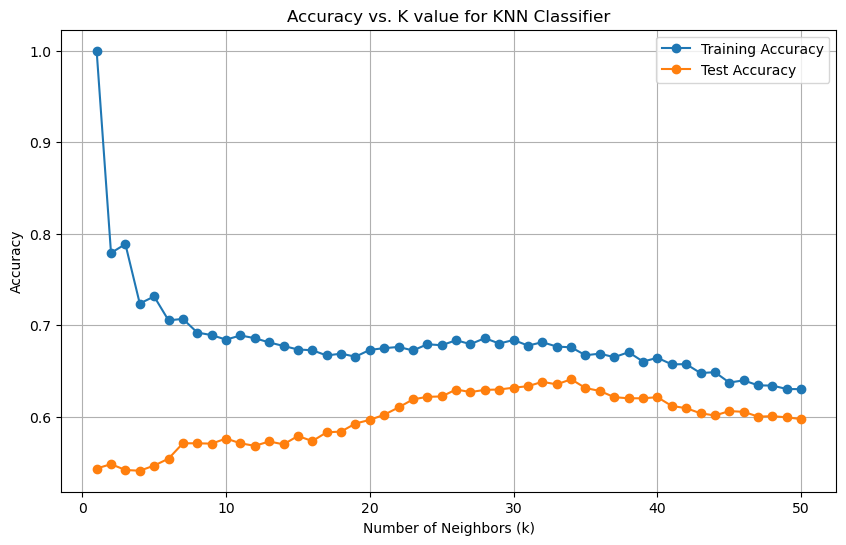

In [123]:

# Define a range of k values to test
k_values = range(1, 51)

# Store accuracy scores for training and test data
train_accuracies = []
test_accuracies = []

# Loop over k values, fit the model, and calculate accuracy for both training and testing data
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X_scaled, train_y)
    
    # Predict on training and testing data
    train_y_pred = knn.predict(train_X_scaled)
    test_y_pred = knn.predict(test_X_scaled)
    
    # Calculate and store accuracy scores
    train_accuracies.append(accuracy_score(train_y, train_y_pred))
    test_accuracies.append(accuracy_score(test_y, test_y_pred))

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Accuracy vs. K value for KNN Classifier')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [124]:
# Find the k with the highest test accuracy
best_k = k_values[test_accuracies.index(max(test_accuracies))]
best_test_accuracy = max(test_accuracies)

# Output the best k and corresponding test accuracy
print(f"Best k: {best_k} with Test Accuracy: {best_test_accuracy:.4f}")

Best k: 34 with Test Accuracy: 0.6408


- From the plot, we would like to pick a k-value that gives the maximum test accuracy score and in this case it's at k=34 where the accuracy score is 64.08%.

## Evaluate Model on Best K-Value with Training and Testing Data

In [125]:
# Create instance of KNN
best_clf = KNeighborsClassifier(best_k)

# Fit model with given training features and target variable
best_clf.fit(train_X_scaled, train_y)

# Make predictions on same training data
train_y_pred = best_clf.predict(train_X_scaled)

# Make predictions on test data based on learning from fitting model on training data
test_y_pred = best_clf.predict(test_X_scaled)

# Evaluate performance on training data
train_accuracy = accuracy_score(train_y, train_y_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Detailed classification report on training data
print("Classification Report (Training Data):")
print(classification_report(train_y, train_y_pred))

# Confusion matrix for training data
print("Confusion Matrix (Training Data):")
print(confusion_matrix(train_y, train_y_pred))

# Evaluate performance on test data
test_accuracy = accuracy_score(test_y, test_y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed classification report on test data
print("Classification Report (Test Data):")
print(classification_report(test_y, test_y_pred))

# Confusion matrix for test data
print("Confusion Matrix (Test Data):")
print(confusion_matrix(test_y, test_y_pred))


Training Accuracy: 0.6757
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      3751
           1       0.68      0.67      0.67      3749

    accuracy                           0.68      7500
   macro avg       0.68      0.68      0.68      7500
weighted avg       0.68      0.68      0.68      7500

Confusion Matrix (Training Data):
[[2551 1200]
 [1232 2517]]
Test Accuracy: 0.6408
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1250
           1       0.64      0.64      0.64      1250

    accuracy                           0.64      2500
   macro avg       0.64      0.64      0.64      2500
weighted avg       0.64      0.64      0.64      2500

Confusion Matrix (Test Data):
[[806 444]
 [454 796]]


- Overall, the best KNN Classifier model with the optimal k value for the healthcare problem is only moderately accurate thus this model isn't the best for classifying individuals as either healthy or unhealthy accurately.
- The model can overall be improved using other machine learning algorithms(i.e. L that will be covered later along with more in-depth EDA and feature engineering to ensure features positively impact the model.